# 🚲 서울시 자전거 이용 데이터 분석
본 프로젝트에서는 2024년 3월 서울시 공공자전거(따릉이) 데이터와 날씨 데이터를 활용하여

**시간대/요일별 이용량**, **인기 대여소/반납소**, **계절별 변화**, **날씨와의 상관관계**를 분석합니다.

데이터 분석 후 클러스터링, 모델링, 시각화 등을 진행했습니다.

In [1]:
import pandas as pd

# 데이터 파일 경로 설정
file_path = "../datas/merged_data.csv"

# CSV 파일 로드
df = pd.read_csv(file_path, encoding='cp949')

# 데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126133 entries, 0 to 2126132
Data columns (total 22 columns):
 #   Column    Dtype  
---  ------    -----  
 0   대여일시      object 
 1   대여소명      object 
 2   대여구분코드    object 
 3   성별        object 
 4   연령대코드     object 
 5   이용건수      int64  
 6   운동량       float64
 7   탄소량       float64
 8   이동거리(M)   float64
 9   이용시간(분)   int64  
 10  요일        object 
 11  시간대       int64  
 12  날짜시간      object 
 13  일시        object 
 14  기온(°C)    float64
 15  강수량(mm)   float64
 16  풍속(m/s)   float64
 17  습도(%)     int64  
 18  지면온도(°C)  float64
 19  적설(cm)    float64
 20  month     int64  
 21  season    object 
dtypes: float64(8), int64(5), object(9)
memory usage: 356.9+ MB


In [2]:
# 필요한 컬럼만 선택 (예시: 기온, 강수량, 이동거리 등)
df_clean = df[['대여일시', '대여소명', '대여구분코드', '성별', '연령대코드', '이용건수', '운동량', '이동거리(M)', '이용시간(분)', '기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '요일', '시간대']]

# '대여일시'를 datetime 형식으로 변환
df_clean['대여일시'] = pd.to_datetime(df_clean['대여일시'])

C:\Users\mj985\AppData\Local\Temp\ipykernel_9104\1135952483.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['대여일시'] = pd.to_datetime(df_clean['대여일시'])


In [3]:
# '대여일시'에서 시간과 요일을 추출
df_clean['시간'] = df_clean['대여일시'].dt.hour
df_clean['요일'] = df_clean['대여일시'].dt.day_name()

# '대여구분코드'를 카테고리형 변수로 변환
df_clean['대여구분코드'] = df_clean['대여구분코드'].astype('category')
df_clean['성별'] = df_clean['성별'].astype('category')
df_clean['연령대코드'] = df_clean['연령대코드'].astype('category')

C:\Users\mj985\AppData\Local\Temp\ipykernel_9104\1034057432.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['시간'] = df_clean['대여일시'].dt.hour
C:\Users\mj985\AppData\Local\Temp\ipykernel_9104\1034057432.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['요일'] = df_clean['대여일시'].dt.day_name()
C:\Users\mj985\AppData\Local\Temp\ipykernel_9104\1034057432.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

## 1. 클러스터링: 시간대, 요일, 대여소 기반 군집화 분석
목표: 출퇴근, 관광 등 패턴을 구분하기 위해 KMeans 클러스터링을 사용하여 시간대, 요일, 대여소 기반으로 군집화 분석을 수행합니다.

C:\Users\mj985\AppData\Local\Temp\ipykernel_9104\950526360.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['요일'] = df_cluster['요일'].astype('category').cat.codes  # 요일을 숫자로 변환
c:\Users\mj985\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mj985\AppData\Local\Temp\ipykernel_9104\950526360.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

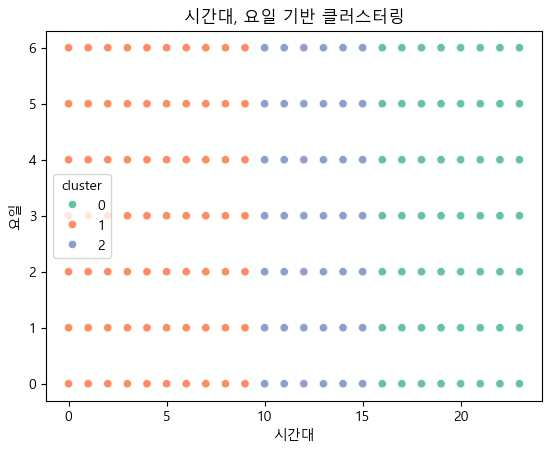

In [6]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import os
import matplotlib.font_manager as fm

# 한글 폰트 설정 
font_path = "C:/Windows/Fonts/malgun.ttf"  # Windows의 경우

font_prop = fm.FontProperties(fname=font_path, size=14)
plt.rc('font', family=font_prop.get_name())

# 이미지 저장 경로 설정
save_dir = '../images'  # 상위 폴더의 images 폴더

# 필요한 컬럼 선택
df_cluster = df[['대여소명', '시간대', '요일']]
df_cluster['요일'] = df_cluster['요일'].astype('category').cat.codes  # 요일을 숫자로 변환

# 군집화 (KMeans)
kmeans = KMeans(n_clusters=3, random_state=42)  # 출퇴근, 관광 등 3개의 군집
df_cluster['cluster'] = kmeans.fit_predict(df_cluster[['시간대', '요일']])

# 군집 시각화
sns.scatterplot(data=df_cluster, x="시간대", y="요일", hue="cluster", palette="Set2")
plt.title("시간대, 요일 기반 클러스터링")
plt.xlabel("시간대")
plt.ylabel("요일")
plt.savefig(os.path.join(save_dir, '클러스터링.png'))  # 그래프 저장
plt.show()

## 2. 예측 모델링 : 날씨/시간대 기반 수요 예측
목표: 날씨(기온, 강수량 등)와 시간대 정보를 기반으로 자전거 이용 수요를 예측합니다. 예측 모델로 XGBoost를 사용합니다.

In [8]:
!pip install xgboost

     -------------------------------------- 150.0/150.0 MB 7.3 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_absolute_error

# 특성 및 목표 변수 선택
X = df[['기온(°C)', '강수량(mm)', '시간대', '풍속(m/s)']]
y = df['이용건수']

# 훈련/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# XGBoost 모델 학습
model = xgb.XGBRegressor(random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 성능 평가 (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 0.13272248037793952


In [10]:
pip freeze > ../requirements.txt

Note: you may need to restart the kernel to use updated packages.
